# 1. Distribución binomial

Considere una población de individuos que no se reproducen, y que evolucionan en tiempo discreto. A cada paso de tiempo cada uno de ellos puede morir con probabilidad $d$. Calcule numéricamente la distribución de probabilidad de la población en función del tiempo (para algunos tiempos, y para un par de valores de d). Compare con la distribución binomial exacta.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from simulations import binomial_simulation

Dada una población inicial $N_0$, la probabilidad de que $n$ individuos sobrevivan $t$ pasos de tiempo esta dado por la siguiente distribución binomial

\begin{equation*}
    P\left(n,t\right) = \begin{pmatrix}
        N_0 \\ k 
    \end{pmatrix} p^n q^{N_0 - n}
\end{equation*}

con $p = (1-d)^t$ la probabilidad de que un individuo sobreviva a $t$ pasos del tiempo y $q=1-p$.

### Población viva en función del tiempo

En primer lugar, veamos como evoluciona la población en función del tiempo. Para esto, realizamos simulaciones para diferentes valores de probabilidad de muerte $d$, partiendo de una población inicial $N_0 = 100$. 

In [3]:
#  Parámetros
N0 = 100  # Población inicial
d_values = [0.01, 0.1, 0.5, 0.7]  # Diferentes probabilidades de muerte
time_steps = 10  # Número de pasos de tiempo a considerar
num_simulations = 1  # Número de simulaciones a realizar

binomial = binomial_simulation(num_simulations, N0)

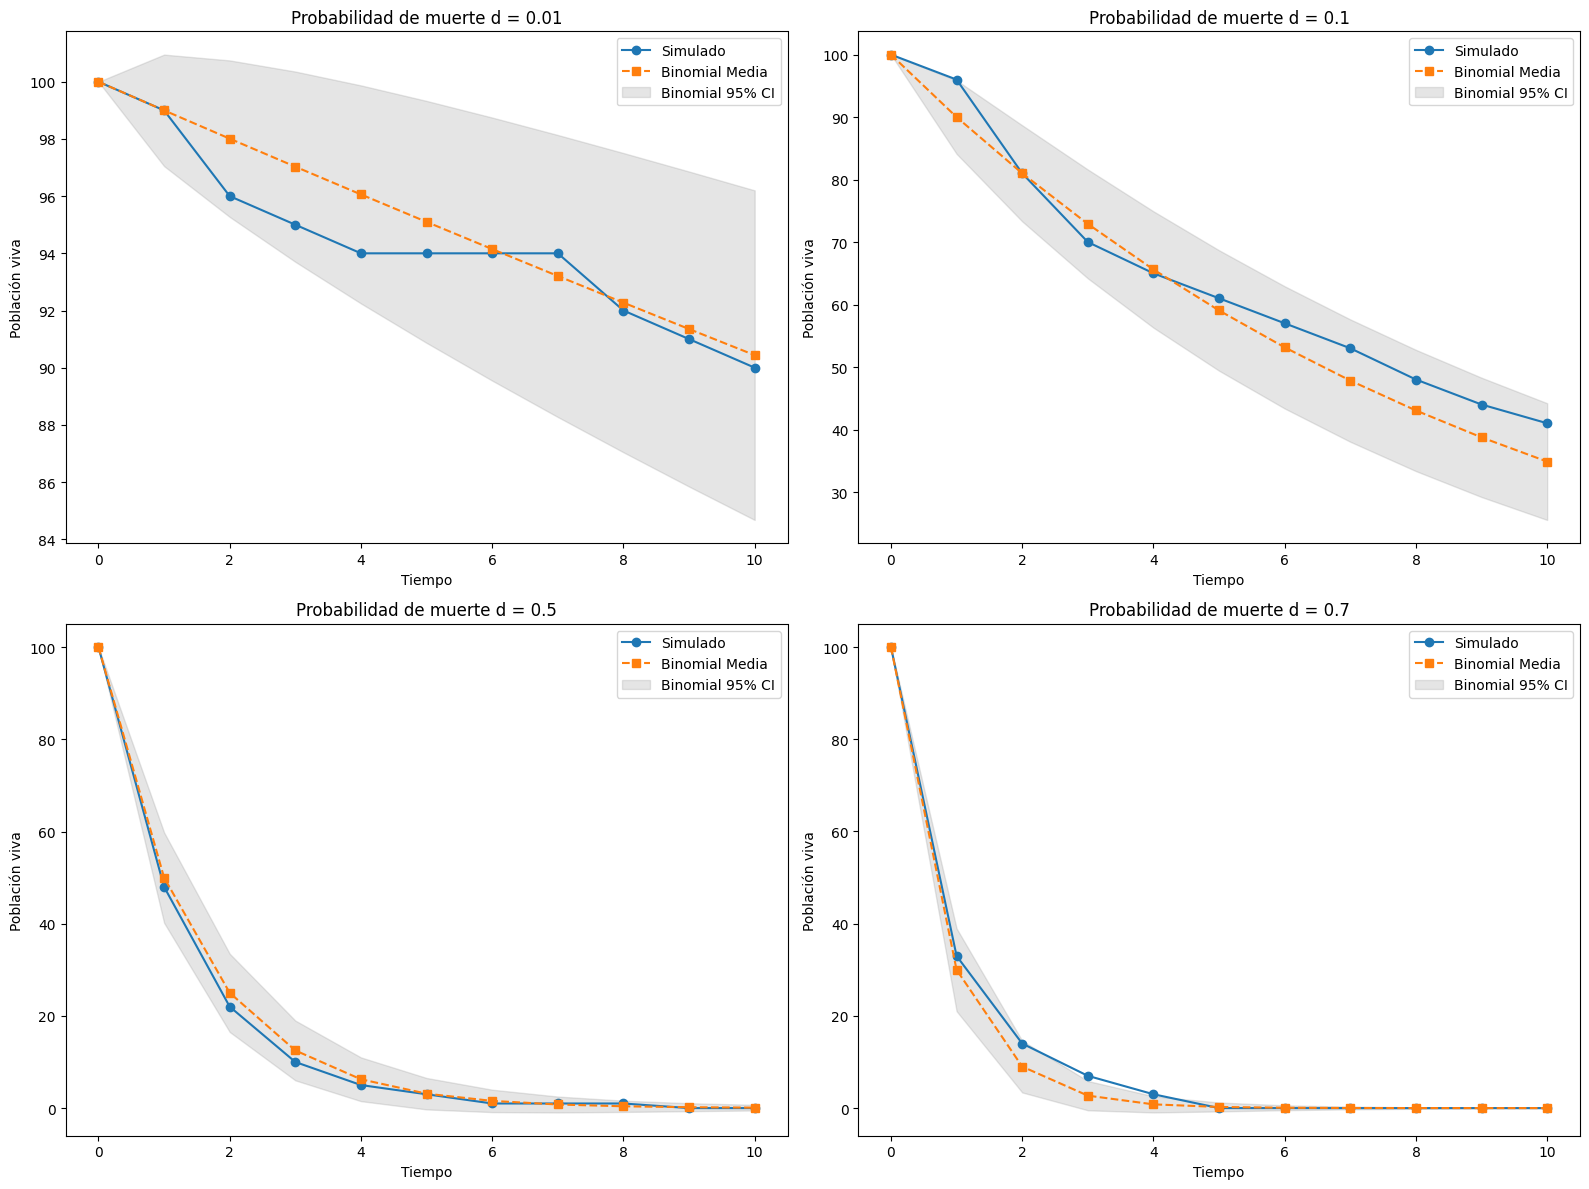

In [4]:
# Simulación numérica
np.random.seed(42)  # Fijar semilla para reproducibilidad

# Resultados para diferentes valores de d
results = {d: binomial.simulate_population(d = d, time_steps = time_steps) for d in d_values}

# Comparación con la distribución binomial exacta
time_points = range(time_steps + 1)

# Gráficas
plt.figure(figsize=(16, 12))

for i, d in enumerate(d_values):
    plt.subplot(2, 2, i + 1)
    
    simulated_populations = results[d]
    exact_binom_means = [N0 * (1 - d) ** t for t in time_points]
    exact_binom_vars = [N0 * (1 - d) ** t * (1 - (1 - d) ** t) for t in time_points]
    
    plt.plot(time_points, simulated_populations, 'o-', label='Simulado')
    plt.plot(time_points, exact_binom_means, 's--', label='Binomial Media')
    plt.fill_between(time_points,
                     np.array(exact_binom_means) - 1.96 * np.sqrt(exact_binom_vars),
                     np.array(exact_binom_means) + 1.96 * np.sqrt(exact_binom_vars),
                     color='gray', alpha=0.2, label='Binomial 95% CI')
    
    plt.title(f'Probabilidad de muerte d = {d}')
    plt.xlabel('Tiempo')
    plt.ylabel('Población viva')
    plt.legend()

plt.tight_layout()
plt.show()

En la gráfica se observan los resultados de la simulación (curva azul) y la media de la binomial exacta (curva naranja) para cada tiempo. La región sombreada en gris representa el intervalo de confianza del 95% alrededor de la media exacta de la distribución binomial. 

Al aumentar $d$ se observa que la población disminuye cada vez más rápido.

### Distribución de población para distintos $d$ y tiempo fijo

Ahora, realizamos 10000 realizaciones de la simulación anterior para distintos valores de $d$ y observamos la población luego de 4 pasos de tiempo. 

In [5]:
# Parámetros
N0 = 100  # Población inicial
time_step = 4  # Número de pasos de tiempo a considerar
num_simulations = 10000  # Número de simulaciones

binomial = binomial_simulation(num_simulations, N0)

100%|██████████| 10000/10000 [00:00<00:00, 384329.58it/s]


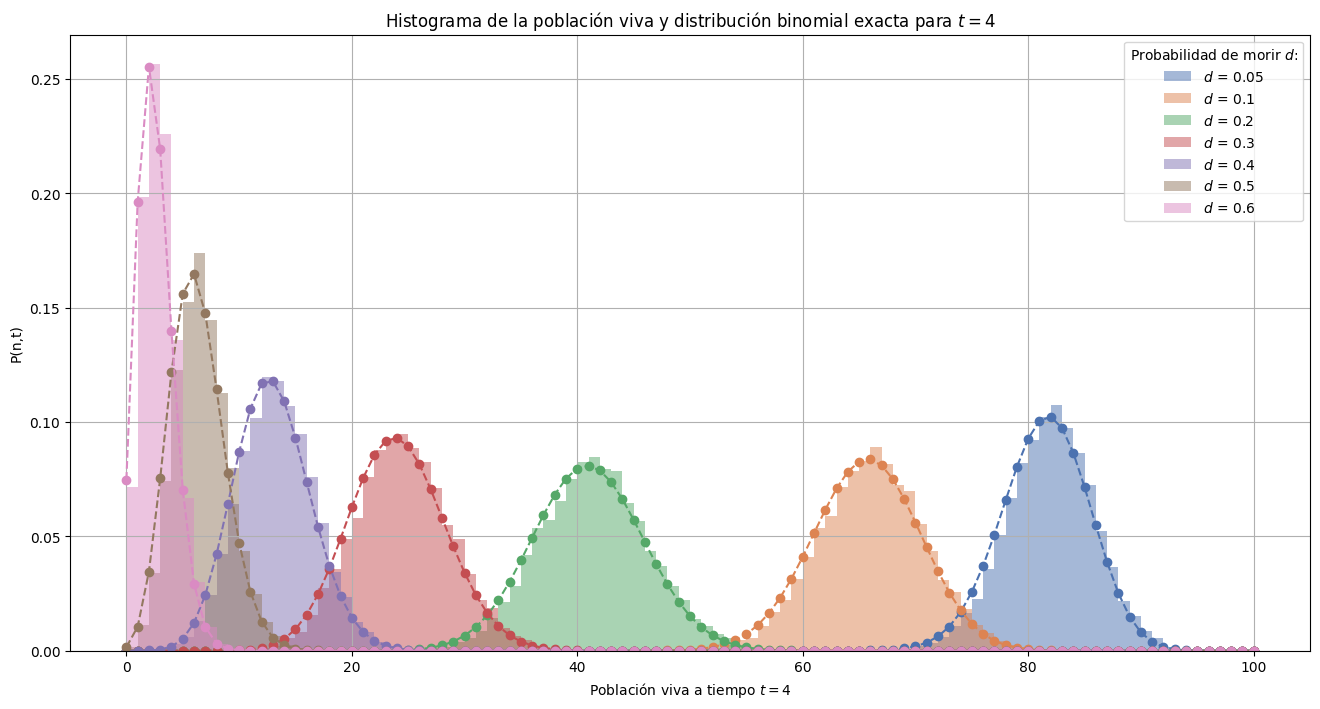

In [6]:
d_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  

plt.figure(figsize=(16, 8))
palette = sns.color_palette('deep', n_colors=len(d_values) + 1)

for i, d in enumerate(d_values):

    populations = binomial.simulate_population_at_time(d = d, time_step = time_step)
    
    # Histograma de la población viva
    plt.hist(populations, bins=np.arange(N0), density=True, alpha=0.5, label=f'$d$ = {d}', color=palette[i])
    
    # Distribución binomial exacta
    plt.plot(range(N0+1), binom.pmf(range(N0+1), N0, (1 - d) ** time_step), 'o--', color=palette[i])

plt.title(f'Histograma de la población viva y distribución binomial exacta para $t = {time_step}$')
plt.xlabel(f'Población viva a tiempo $t = {time_step}$')
plt.ylabel(f'P(n,t)')
plt.legend(title="Probabilidad de morir $d$:")
plt.grid(True)
plt.show()

En la gráfica se muestra la distribución de la población junto con la distribucion binomial exacta para cada valor de $d$ luego de 4 pasos de tiempo. Vemos que todas las distribuciones siguen la distribución binomial y como es de esperar, para valores más grandes de probabilidad de muerte $d$, menor es la media de la distribución. 

### Distribución de población para distintos tiempos y $d$ fijo

Por último, graficamos la evolución temporal del histograma de al población para $d=0.3$. Para esto nuevamente realizamos 10000 simulaciones del sistema para cada tiempo.

In [7]:
# Parámetros
N0 = 100  # Población inicial
d = 0.3  # Probabilidad de muerte
num_simulations = 10000  # Número de simulaciones

binomial = binomial_simulation(num_simulations, N0)

100%|██████████| 10000/10000 [00:00<00:00, 202927.28it/s]


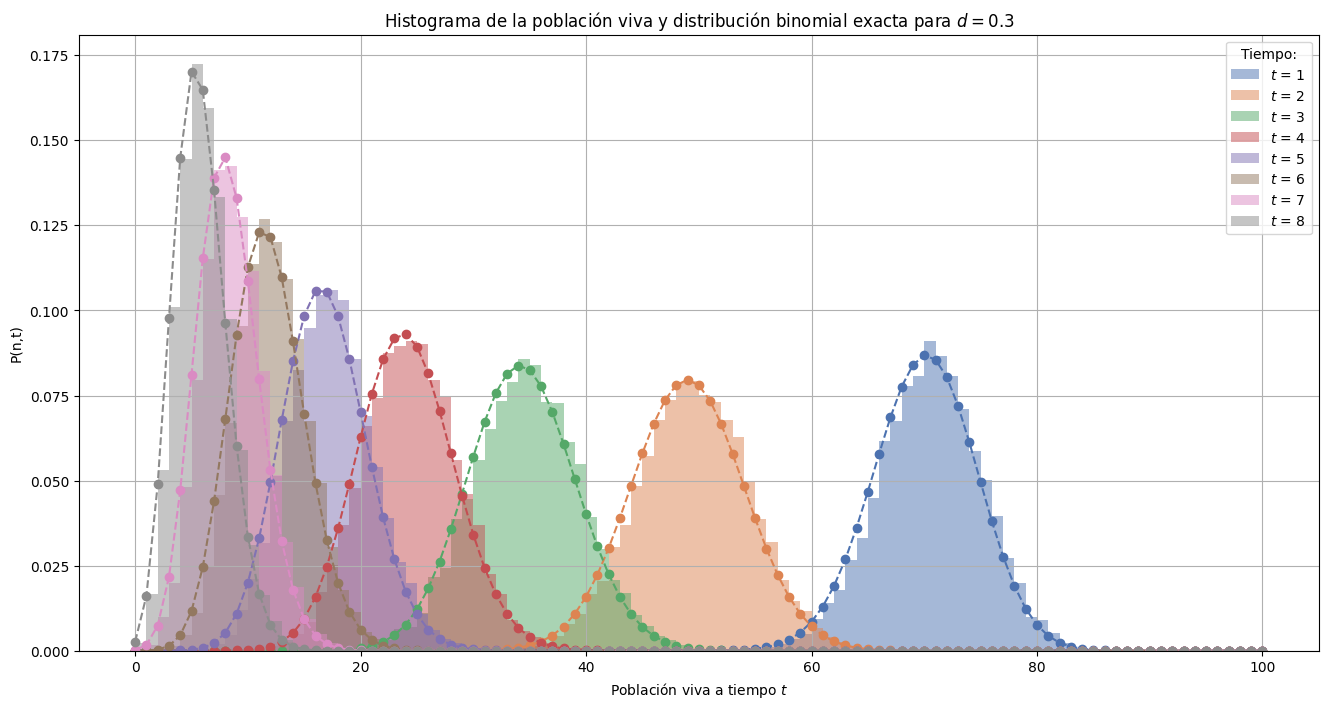

In [8]:
time_steps = [1, 2, 3, 4, 5, 6, 7, 8]  # Diferentes números de pasos de tiempo a considerar

plt.figure(figsize=(16, 8))
palette = sns.color_palette('deep', n_colors=len(time_steps) + 1)

for i, time_step in enumerate(time_steps):
    
    populations = binomial.simulate_population_at_time(d=d, time_step=time_step)
    
    # Histograma de la población viva
    plt.hist(populations, bins=np.arange(N0+1), density=True, alpha=0.5, label=f'$t$ = {time_step}', color=palette[i])
    
    # Distribución binomial exacta
    plt.plot(range(N0+1), binom.pmf(range(N0+1), N0, (1 - d) ** time_step), 'o--', color=palette[i])

plt.title(f'Histograma de la población viva y distribución binomial exacta para $d = {d}$')
plt.xlabel(f'Población viva a tiempo $t$')
plt.ylabel(f'P(n,t)')
plt.legend(title="Tiempo:")
plt.grid(True)
plt.show()

En la gráfica se muestra la distribución de la población junto con la distribucion binomial exacta a cada paso de tiempo. Veamos que en el primer paso de tiempo la distribución ya adquiere forma binomial y que, conforme avanza el tiempo la media de la población tiende a 0 como se esperaría en este sistema ya que la población siempre se reduce. 

# 2. Ecuaciones de Langevin

Considere una población continua $x(t)$, con una dinámica multiplicativa en tiempo discreto y un ruido aditivo: $$x(t + 1) = a x(t) + z(t),$$ donde la variable estocástica $z(t)$ tiene distribución gaussiana con media cero y desviación estándar $\sigma$. Simule una docena de trayectorias del sistema, partiendo de $x(0) = 1$ y usando $a = 1.05$, $\sigma = 0.2$, hasta tiempo $50$. Compare las trayectorias estocásticas con la correspondiente dinámica sin ruido, en un gráfico de $x$ en función del tiempo. Simule un ensemble de trayectorias y calcule la distribución de probabilidad $P(x, t)$, y grafíquela (ya sea en 3D, o usando t como parámetro). Haga lo mismo para una dinámica con ruido multiplicativo: $$x(t + 1) = a x(t) + z(t) x(t).$$

En primer lugar, realizamos 12 simulaciones de una población con dinámica multiplicativa con: ruido aditivo y ruido multiplicativo. Es importante destacar que en la simulación, si el valor que toma $x$, es decir la población se hace negativo o 0, consideramos que la población se extingue y será nula por el resto de la simulación. Veamos que para el ruido multiplicativo, una vez que $x=0$ luego será siempre 0 ya que ambos términos son proporcionales a $x$. En el ruido aditivo esto no ocurre, una pequeña fluctuación podría ocacionar que la población "reviva" lo cual no es demasiado realista.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from simulations import langevin_simulation

In [10]:
# Parámetros del sistema
a = 1.05
sigma = 0.2
x0 = 1
time_steps = 50

num_trajectories = 12
ensemble_size = 100000

langevin = langevin_simulation(a, sigma, x0, time_steps)

In [11]:
# Simulación de las trayectorias estocásticas
print('Simulación con ruido aditivo:')
trajectories_additive = langevin.simulate_trajectories_additive(num_trajectories=num_trajectories)
print('\nSimulación con ruido multiplicativo:')
trajectories_multiplicative = langevin.simulate_trajectories_multiplicative(num_trajectories=num_trajectories)

Simulación con ruido aditivo:


100%|██████████| 12/12 [00:00<00:00, 5878.49it/s]



Simulación con ruido multiplicativo:


100%|██████████| 12/12 [00:00<00:00, 12032.43it/s]


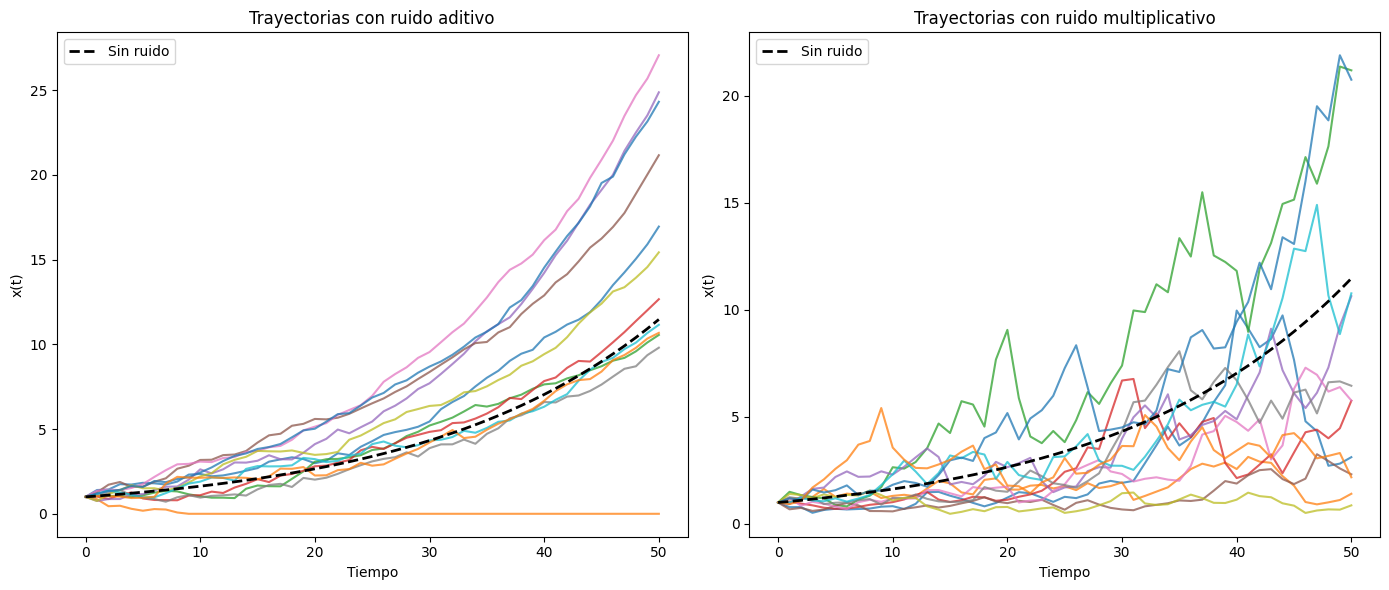

In [12]:
# Dinámica sin ruido
x_deterministic = [x0 * (a ** t) for t in range(time_steps + 1)]

# Gráfico de las trayectorias estocásticas y la dinámica sin ruido
time_points = np.arange(time_steps + 1)
plt.figure(figsize=(14, 6))

# Ruido aditivo
plt.subplot(1, 2, 1)
for i in range(num_trajectories):
    plt.plot(time_points, trajectories_additive[i], alpha=0.75)
plt.plot(time_points, x_deterministic, 'k--', linewidth=2, label='Sin ruido')
plt.title('Trayectorias con ruido aditivo')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()

# Ruido multiplicativo
plt.subplot(1, 2, 2)
for i in range(num_trajectories):
    plt.plot(time_points, trajectories_multiplicative[i], alpha=0.75)
plt.plot(time_points, x_deterministic, 'k--', linewidth=2, label='Sin ruido')
plt.title('Trayectorias con ruido multiplicativo')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()
plt.tight_layout()
plt.show()

- Ruido aditivo:
    Se observa como las trayectorias con ruido aditivo se alejan de la curva determinista sin ruido. Además vemos que las trayectorias, si bien se alejan, no son muy ruidosas y mantienen la forma de la curva determinista. Cabe mencionar que el ruido aditivo influye más a tiempos cortos debido a que es más comparable al tamaño de la población a tiempos cortos.

- Ruido multiplicativo:
    En este caso si se observan mucho más ruidosas que en el caso aditivo, debido a la naturaleza del ruido multiplicativo que amplifica la población lo cual modifica bruscamente la dinámica. A diferencia del ruido aditivo, el término de ruido es proporcional al tamaño de la población a cada tiempo, por lo tanto es esperable que las curvas tengan variaciones más bruscas en la dinámica.


In [13]:
# Simulación del ensemble
print(f"Simulación con ruido aditivo:")
ensemble_additive = langevin.simulate_trajectories_additive(num_trajectories = ensemble_size)
print(f"Simulación con ruido multiplicativo:")
ensemble_multiplicative = langevin.simulate_trajectories_multiplicative(num_trajectories = ensemble_size)

Simulación con ruido aditivo:


100%|██████████| 100000/100000 [00:03<00:00, 32007.65it/s]


Simulación con ruido multiplicativo:


100%|██████████| 100000/100000 [00:03<00:00, 28657.23it/s]


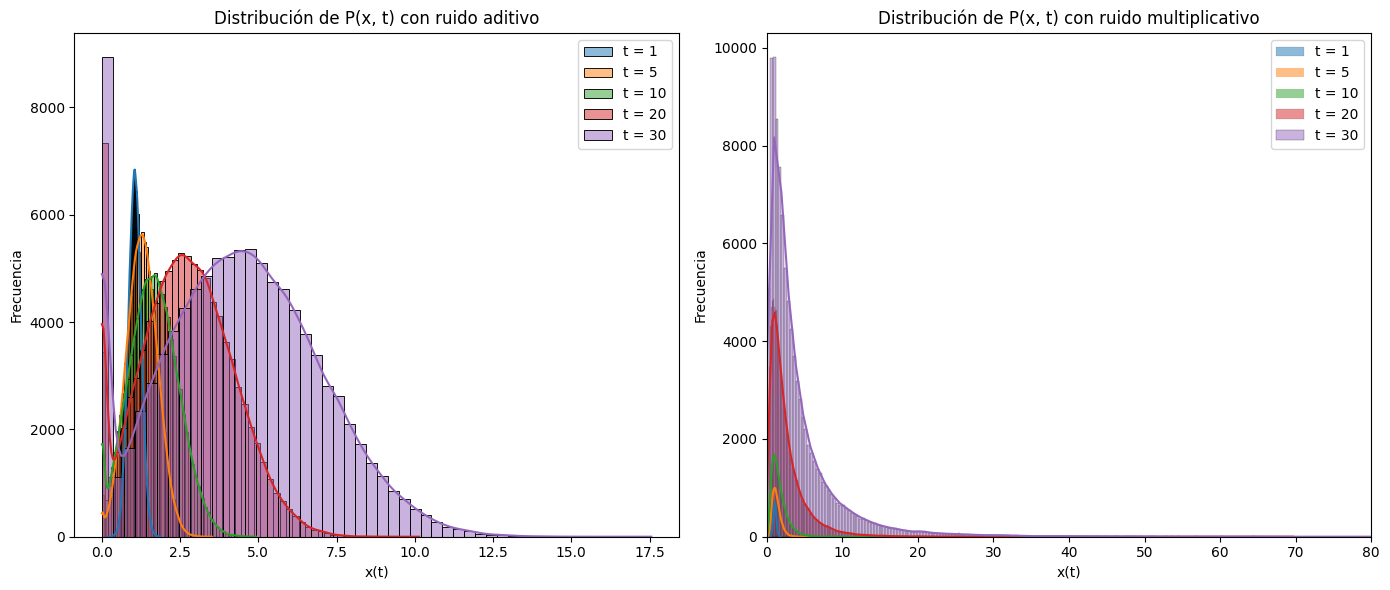

In [14]:
time_intervals = [1, 5, 10, 20, 30]

plt.figure(figsize=(14, 6))

# Ruido aditivo
plt.subplot(1, 2, 1)
for t in time_intervals:
    sns.histplot(ensemble_additive[:, t], kde=True, label=f't = {t}', bins=50)
plt.title('Distribución de P(x, t) con ruido aditivo')
plt.xlabel('x(t)')
plt.ylabel('Frecuencia')
plt.legend()
# Ruido multiplicativo
plt.subplot(1, 2, 2)
for t in time_intervals:
    ax = sns.histplot(ensemble_multiplicative[:, t], kde=True, label=f't = {t}', bins=500)
    ax.set_xlim(0, 80)
plt.title('Distribución de P(x, t) con ruido multiplicativo')
plt.xlabel('x(t)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

- Ruido aditivo: Vemos una acumulación en 0 ya que una vez que el sistema se extingue no


- Ruido multiplicativo:

# 3. Simulación estocástica

Considere un sistema con reproducción y competencia intraespecífica, del tipo:

\begin{aligned}
    A & \xrightarrow{b} A + A \\
    A + A & \xrightarrow{d} A
\end{aligned}

    
Simule la evolución de la población usando el algoritmo de Gillespie. Usando distintos valores de las tasas $b$ y $d$, y distintas condiciones iniciales, observe los distintos comportamientos, tanto transitorios como asintóticos. Grafique algunos casos característicos, comparándolos con la solución de la ecuación logística que da el comportamiento macroscópico. 

Para una elección de $b$ y $d$ que permita un estado estacionario positivo (por ejemplo, $b = 0.1$, $d = 0.001$ da un valor medio estacionario $\langle x \rangle = 100$), use múltiples realizaciones para calcular la distribución estacionaria $P(x)$. 

Para una elección de $b$ y $d$ que produzca extinciones por fluctuaciones ($b = 0.1$, $d = 0.02$, $n(0) = 10$), use múltiples realizaciones para calcular la distribución del tiempo de extinción.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from simulations import gillespie_simulation

In [16]:
# Parámetros iniciales
n0 = 5
T = 10
ensemble_size = 10000

b_values = [0.5, 1.0, 1.5]
d_values = [0.01, 0.02, 0.03]

gillespie = gillespie_simulation()

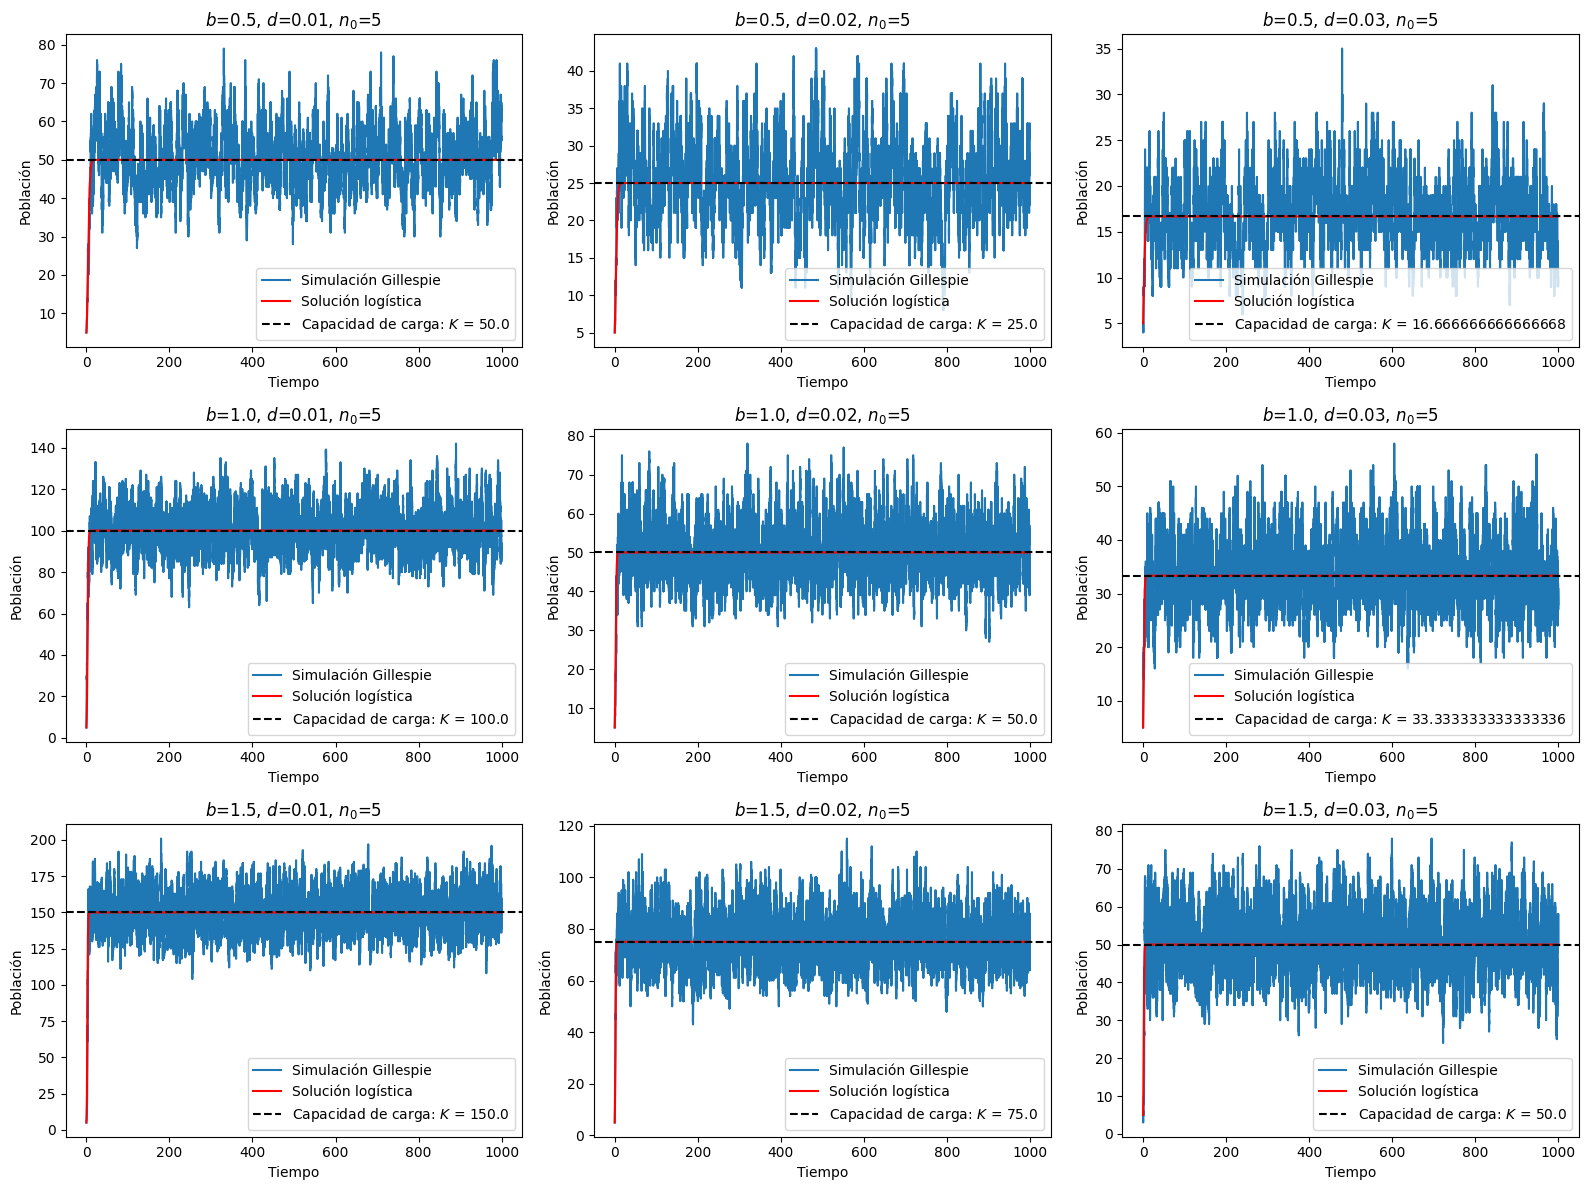

In [28]:
num_rows = len(b_values)
num_cols = len(d_values)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, b in enumerate(b_values):
    for j, d in enumerate(d_values):
        time_points, population = gillespie.gillespie_algorithm(b, d, n0, T)
        t = np.arange(0, T, 0.01)
        N = gillespie.sol_logistic(b, d, n0, t)
        x_mean = np.mean(population[150:])
        
        ax = axes[i, j]
        ax.plot(time_points, population, label='Simulación Gillespie')
        ax.plot(t, N, 'r-', label='Solución logística')
        ax.axhline(y=b/d, color='k', linestyle='--', label=f'Capacidad de carga: $K$ = {b/d}')
        ax.set_xlabel('Tiempo')
        ax.set_ylabel('Población')
        ax.set_title(f'$b$={b}, $d$={d}, $n_0$={n0}')
        ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [18]:
b = 0.1 
d = 0.001
n0 = 10
T = 1000  # Tiempo máximo de simulación
ensemble_size = 10000

gillespie = gillespie_simulation() 

In [19]:
time_points, population = gillespie.gillespie_algorithm(b = b, d = d, n0 = n0, T = T)
t = np.arange(0,T,1)
N = gillespie.sol_logistic(b = b, d = d, n0 = n0, T = t)
x_mean = np.mean(population[150:])
print(f'Valor medio de la población en estado estacionario: {x_mean}')

Valor medio de la población en estado estacionario: 99.9802135678392


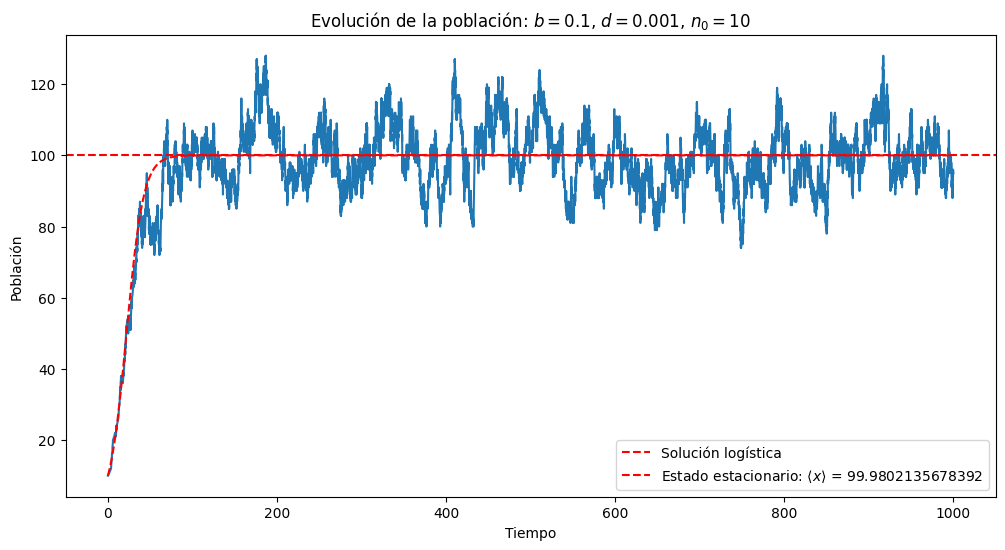

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(time_points, population)
plt.plot(t, N, 'r--', label='Solución logística')
plt.axhline(y=x_mean, color='r', linestyle='--', label=f'Estado estacionario: $\\langle x \\rangle$ = {x_mean}')
plt.xlabel(f'Tiempo')
plt.ylabel(f'Población')
plt.title(f'Evolución de la población: $b={b}$, $d={d}$, $n_0={n0}$')
plt.legend(loc = 'lower right')
plt.show()

### Elección de $b$ y $d$ para obtener un estado estacionario positivo 

In [21]:
population_at_T = []

for _ in tqdm(range(ensemble_size)):
    time_points, population = gillespie.gillespie_algorithm(b = b, d = d, n0 = n0, T = T)
    population_at_T.append(population[-1])

100%|██████████| 10000/10000 [02:36<00:00, 63.97it/s]


Text(0, 0.5, 'Frecuencia')

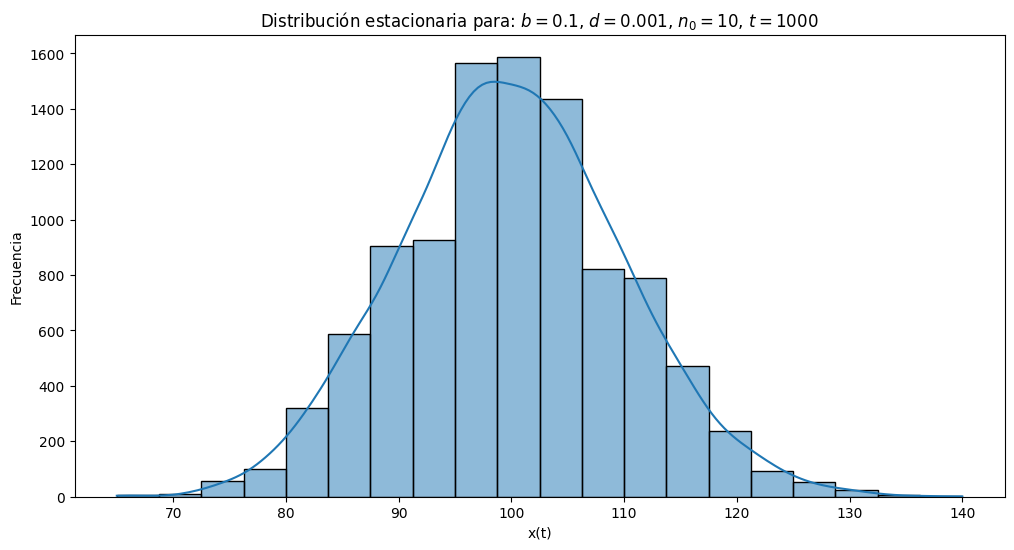

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(population_at_T, kde=True, bins=20)
plt.title(f'Distribución estacionaria para: $b={b}$, $d={d}$, $n_0={n0}$, $t = {T}$')
plt.xlabel('x(t)')
plt.ylabel('Frecuencia')

# Elección de $b$ y $d$ para que se produzcan extinciones por fluctuaciones

In [23]:
b = 0.1
d = 1
n0 = 5
T = 1000  # Tiempo máximo de simulación

gillespie = gillespie_simulation() 

In [24]:
time_points, population = gillespie.gillespie_algorithm(b = b, d = d, n0 = n0, T = T)

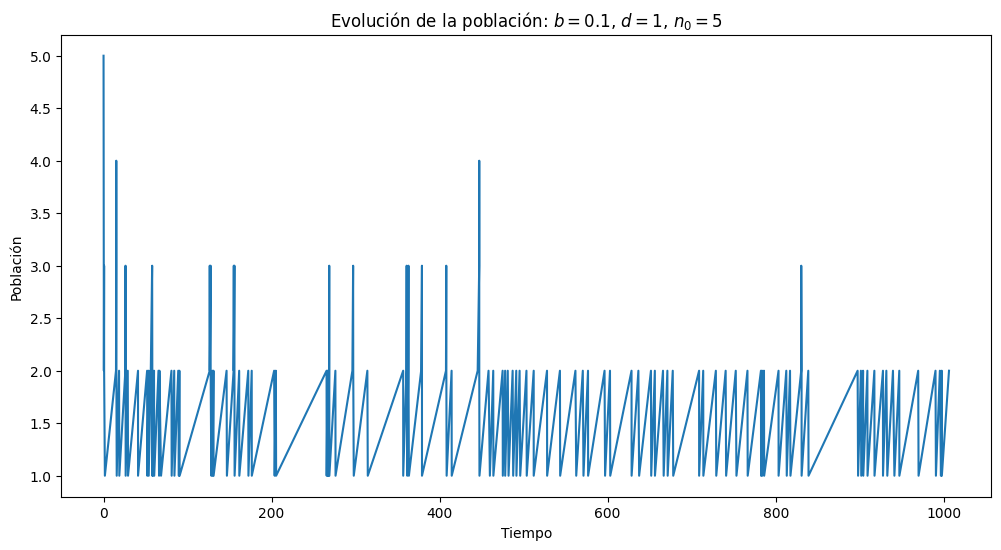

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(time_points, population)
plt.xlabel(f'Tiempo')
plt.ylabel(f'Población')
plt.title(f'Evolución de la población: $b={b}$, $d={d}$, $n_0={n0}$')
plt.show()